# What are the effects of each variable on thermal evolution?
<a class="anchor" id="top"></a>
<p align="right">

Variable is
+ $^{60}Fe/^{56}Fe = [0,10^{-9},10^{-8},10^{-7},6\times10^{-7}]$- params_6

Fixed values are:
+ $\phi_{rcmf}$=0.3
+ $\eta_0=10^{19}$Pas
+ $\beta=0.0225$ $K^{-1}$ 
+ $\eta_l=100$Pas
+ $\alpha_n=30$
+ $X_{S,0}=29.5$wt%
+ r=300km

For each variable there are two [temperature-time](#Tt) and [flux-time](#Ft) plots for the two endmembers.
Across all values, there are plots for:
+ [peak core and mantle temperatures](#peakT)
+ [Rem, B and compositional flux](#BRem-p) 
+ [Rem, B and core solidification](#BRem-solid) 
+ [Inner core size](#f)
+ [timings](#time) all thermal history timings
    + [filled](#time-filled)
+ [Dynamo timings](#dynamo)
+ [Solidification time](#solid)
+ [Lid thickness](#lid)

# Set-up
This can be run once for a specific variable

## Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns

Colours for plotting (there are a lot as there are a lot of values of $\eta_0$)

In [2]:
colors = ['black','darkblue','blue','royalblue','cornflowerblue','paleturquoise','salmon','maroon','saddlebrown','chocolate','orange','tan','olive','olivedrab','yellowgreen','darkolivegreen']

## Import data

In [3]:
folder = 'Paper_run1/'
subfolders = {'rcmf':1,'eta0':2,'beta':3,'etal':4,'Xs_0':5,'Fe0':6,'alpha_n':7,'r':8}
labels = {'rcmf':'$\\phi_{{RCMF}}$','eta0':'$\\eta_0$','beta':'$\\beta$','etal':'$\\eta_l$ ','Xs_0':'$X_{{s,0}}$','Fe0':'$^{{60}}Fe/^{{56}}Fe$','alpha_n':'$\\alpha_n$','r':'radius'}
Myr = 365*24*3600*1e6 #number of s in Myr

Choose your variable of interest

In [24]:
var = 'Fe0'
unit = '' #unit of variable
varlab = labels[var]
logvar = True
save = True
path = '../Results_combined/'+folder+f"params_{subfolders[var]}/"

Import the temperature profile data for the two endmembers

In [5]:
#find run numbers
var_data = pd.read_csv(path+'auto_params.csv',skiprows=[1])
var_results = pd.read_csv(f'../Results_combined/{folder}/all_sucess_info.csv',skiprows=[1])
minrun = min(var_data['run'])
maxrun = max(var_data['run'])
nrun = len(var_data)
data = var_results[(var_results['run']>=minrun)&(var_results['run']<=maxrun)].copy(deep=True)
data.reset_index(inplace=True,drop=True)

Find min and max var values for labelling

In [6]:
var1=var_data.loc[var_data['run']==minrun,var].values[0]
var2=var_data.loc[var_data['run']==maxrun,var].values[0]

## Import lowest endmember

In [7]:
#End member 1
run = int(minrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t1 = npzfile['t']/Myr #time in Myr
d01 = npzfile['d0'] 
dl1 = npzfile['dl']
f1 = npzfile['f']
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs1 = Flux[0]
Fcmb1 = Flux[1]
Fad1 = Flux[2]
Frad1 = Flux[3]

#time for field to be on
on11=var_results.loc[var_results['run']==minrun,'magon_1'].values[0]
off11=var_results.loc[var_results['run']==minrun,'magoff_1'].values[0]
on12=var_results.loc[var_results['run']==minrun,'magon_2'].values[0]
off12=var_results.loc[var_results['run']==minrun,'magoff_2'].values[0]
on13=var_results.loc[var_results['run']==minrun,'magon_3'].values[0]
off13=var_results.loc[var_results['run']==minrun,'magoff_3'].values[0]

#get time for switch to conduction
fcond_t1 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]
#Concatenate
Tall_1 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_1 = np.append(tdiff,t1)
d0_all_1 = np.append(d0_diff,d01)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r1 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_1 = np.arange(0,r1+dr,dr)/1e3

In [8]:
#find unstable indices for plotting core stratification
r_unstable1=np.array([]) 
for ind in min_unstable:
    r_unstable1 = np.append(r_unstable1,rplot_1[int(ind)])
rc1 = r1/2

## Import highest endmember

In [9]:
#End member 2
run = int(maxrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t2 = npzfile['t']/Myr #time in Myr 
d02 = npzfile['d0'] 
dl2 = npzfile['dl']
f2 = npzfile['f']
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs2 = Flux[0]
Fcmb2 = Flux[1]
Fad2 = Flux[2]
Frad2 = Flux[3]

#time for field to be on
on21=var_results.loc[var_results['run']==maxrun,'magon_1'].values[0]
off21=var_results.loc[var_results['run']==maxrun,'magoff_1'].values[0]
on22=var_results.loc[var_results['run']==maxrun,'magon_2'].values[0]
off22=var_results.loc[var_results['run']==maxrun,'magoff_2'].values[0]
on23=var_results.loc[var_results['run']==maxrun,'magon_3'].values[0]
off23=var_results.loc[var_results['run']==maxrun,'magoff_3'].values[0]
#get time for switch to conduction
fcond_t2 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#Concatenate
Tall_2 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_2 = np.append(tdiff,t2)
d0_all_2 = np.append(d0_diff,d02)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r2 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_2 = np.arange(0,r2+dr,dr)/1e3

In [10]:
#find unstable indices for plotting core stratification
r_unstable2=np.array([]) 
for ind in min_unstable:
    r_unstable2 = np.append(r_unstable2,rplot_2[int(ind)])
rc2 = r2/2

## Temperature profiles <a class="anchor" id="Tt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [11]:
tend = max(np.max(t1),np.max(t2)) #upper limit for time axes

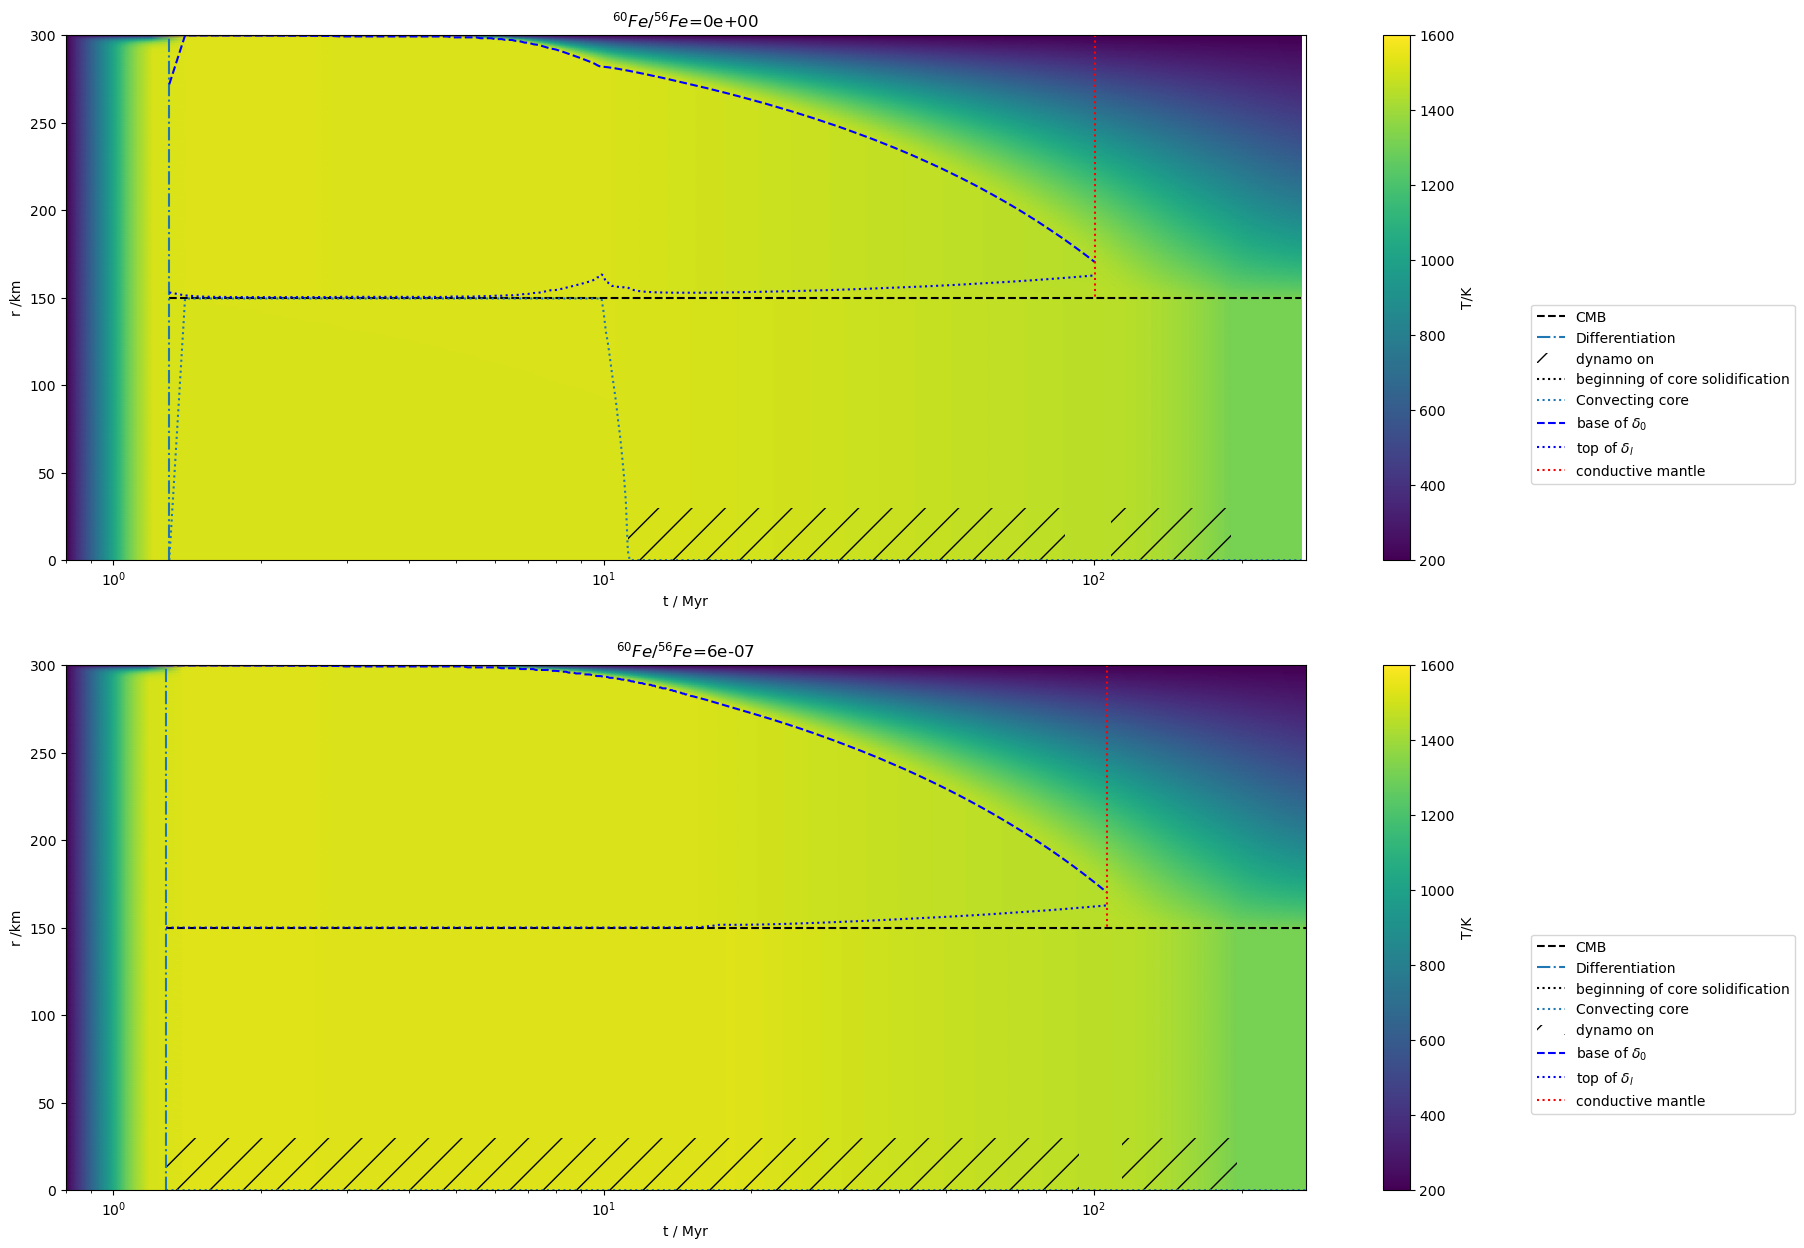

In [64]:
plt.figure(figsize=[20,15])
#subplot 1 - min value
plt.subplot(2,1,1)
plt.pcolormesh(tall_1[::2],rplot_1[::2],Tall_1[::2,::2],shading = 'gouraud',vmin=200,vmax=1600)
plt.hlines(rc1/1e3,min(t1),max(tall_1),linestyle='--',color='black',label='CMB')
plt.vlines(t1[0],0,r1/1e3,linestyle='-.',label='Differentiation')
plt.fill_betweenx([0,rc1/5e3],on11,off11,alpha=0,hatch='/',label='dynamo on')
plt.vlines(t1[f1<0.999000][0]/Myr,0/1e3,rc1/1e3,linestyle='dotted',label='beginning of core solidification',color='black')
plt.plot(t1,r_unstable1,linestyle='dotted',label='Convecting core')
if on12>0:
    plt.fill_betweenx([0,rc1/5e3],on12,off12,alpha=0,hatch='/')
if on13>0:
    plt.fill_betweenx([0,rc1/5e3],on13,off13,alpha=0,hatch='/')
if np.any(t1/Myr<fcond_t1):
    plt.plot(t1[(t1<=fcond_t1)&(d01<(r1-rc1))],(r1-d01[(t1<=fcond_t1)&(d01<(r1-rc1))])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t1[(t1<=fcond_t1)&((rc1+dl1)<r1)],(rc1+dl1[(t1<=fcond_t1)&((rc1+dl1)<r1)])/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
    plt.vlines(t1[t1<=fcond_t1][-1],r1/1e3,rc1/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t1,(r1-d01)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t1,(rc1+dl1)/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,tend])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var1:.0e} {unit}")
plt.xscale('log')
plt.legend(bbox_to_anchor=[1.4,0.5])

#subplot 2 - max value
plt.subplot(2,1,2)
plt.pcolormesh(tall_2[::2],rplot_2[::2],Tall_2[::2,::2],shading = 'gouraud',vmin=200,vmax=1600)
plt.hlines(rc2/1e3,min(t2),max(tall_2),linestyle='--',color='black',label='CMB')
plt.vlines(t2[0],0,r2/1e3,linestyle='-.',label='Differentiation')
plt.vlines(t2[f2<0.999000][0]/Myr,0/1e3,rc2/1e3,linestyle='dotted',label='beginning of core solidification',color='black')
plt.plot(t2,r_unstable2,linestyle='dotted',label='Convecting core')
plt.fill_betweenx([0,rc2/5e3],on21,off21,alpha=0,hatch='/',label='dynamo on')
if on22>0:
    plt.fill_betweenx([0,rc2/5e3],on22,off22,alpha=0,hatch='/')
if on23>0:
    plt.fill_betweenx([0,rc2/5e3],on23,off23,alpha=0,hatch='/')
if np.any(t2/Myr<fcond_t2):
    plt.plot(t2[(t2<=fcond_t2)&(d02<(r2-rc2))],(r2-d02[(t2<=fcond_t2)&(d02<(r2-rc2))])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t2[(t2<=fcond_t2)&((rc2+dl2)<r2)],(rc2+dl2[(t2<=fcond_t2)&((rc2+dl2)<r2)])/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
    plt.vlines(t2[t2<=fcond_t2][-1],r2/1e3,rc2/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t2,(r2-d02)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t2,(rc2+dl2)/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,tend])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var2} {unit}")
plt.xscale('log')
plt.legend(bbox_to_anchor=[1.4,0.5])
if save == True:
    plt.savefig(f'../Plots/{folder}/Tprofile_{var}.png',bbox_inches='tight')

Just the second variable

### Peak core and mantle temperature <a class="anchor" id="peakT"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [12]:
#find upper and lower bounds for time colour maps
combt = np.concatenate([data['tmax'],data['tcoremax']])
tmin = min(combt)
tmax = max(combt)

/tmp/ipykernel_71892/333214201.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ticks=[0,1e-9,1e-8,1e-7,6e-7],spacing='uniform',orientation='vertical',label='$^{60}Fe/^{56}Fe$')


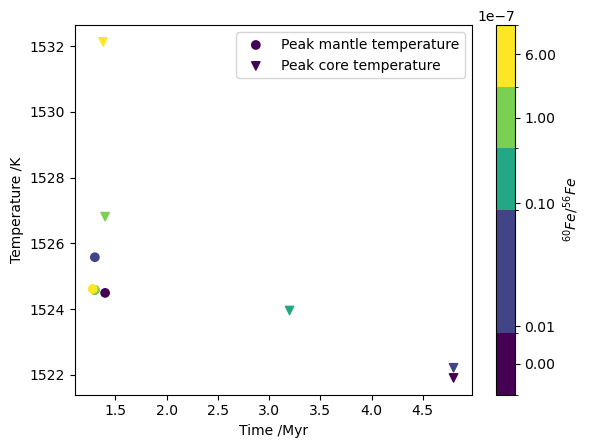

In [15]:
cmap = plt.colormaps['viridis']
bounds = [-0.5e-9,0.5e-9,0.5e-8,0.5e-8,0.5e-7,1.5e-7,1e-6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure()
plt.scatter(data['tmax'],data['peakT'],label='Peak mantle temperature',marker='o',c=data[var],cmap=cmap,norm=norm)
plt.scatter(data['tcoremax'],data['peak_coreT'],label='Peak core temperature',marker='v',c=data[var],cmap=cmap,norm=norm)
plt.xlabel(f'Time /Myr')
plt.legend()
plt.ylabel('Temperature /K')
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ticks=[0,1e-9,1e-8,1e-7,6e-7],spacing='uniform',orientation='vertical',label='$^{60}Fe/^{56}Fe$')
if save == True:
    plt.savefig(f'../Plots/{folder}/peakTt_{var}.png',bbox_inches='tight')            

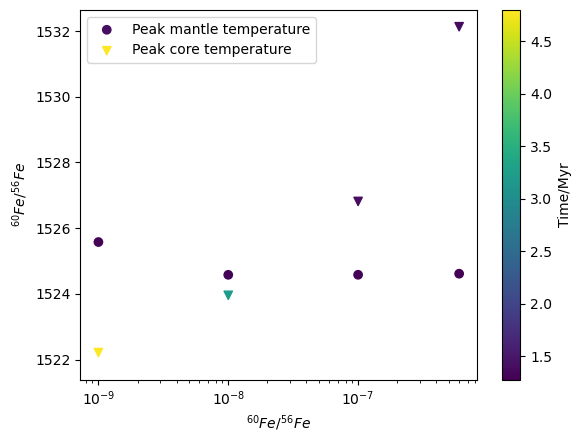

In [19]:
fig = plt.figure()
plt.scatter(data[var],data['peakT'],label='Peak mantle temperature',marker='o',c=data['tmax'],vmin=tmin,vmax=tmax)
plt.scatter(data[var],data['peak_coreT'],label='Peak core temperature',marker='v',c=data['tcoremax'],vmin=tmin,vmax=tmax)
plt.xlabel(varlab)
plt.xscale('log')
plt.legend()
plt.ylabel(varlab)
plt.colorbar(label='Time/Myr')
if save == True:
    plt.savefig(f'../Plots/{folder}/peakTFe_{var}.png',bbox_inches='tight')         

The no radiogenic heating point is missing from this plot - but it is only 0.3K cooler than the $10^{-9}$ point.

Difference in peak temperatures

In [17]:
data['peak_coreT']-data['peakT']

0   -2.588147
1   -3.364843
2   -0.623297
3    2.232157
4    7.518302
dtype: float64

Difference in timing of peak temperatures

In [18]:
data['tcoremax']-data['tmax']

0    3.399678
1    3.499669
2    1.899820
3    0.099991
4    0.099991
dtype: float64

# Flux-time <a class="anchor" id="Ft"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Two endmembers

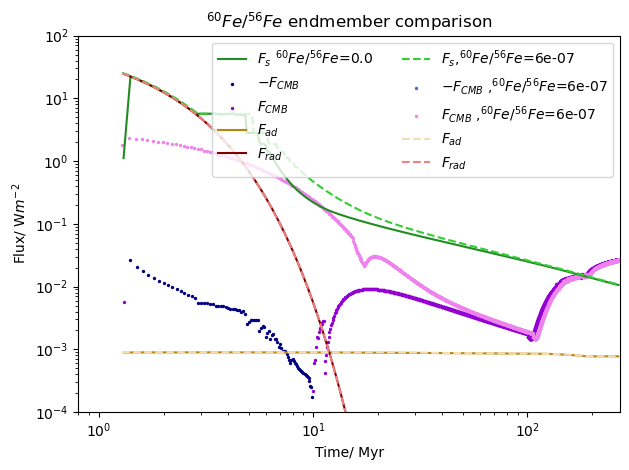

In [25]:
plt.figure(tight_layout=True)
#end member 1
plt.plot(t1,Fs1,label=f'$F_s$ {varlab}={var1} {unit}',color='forestgreen')
plt.scatter(t1[Fcmb1<0],abs(Fcmb1[Fcmb1<0]),label='$-F_{CMB}$',color='navy',s=2)
plt.scatter(t1[Fcmb1>0],Fcmb1[Fcmb1>0],label='$F_{CMB}$',color='darkviolet',s=2)
plt.plot(t1,Fad1,label='$F_{ad}$',color='darkgoldenrod')
plt.plot(t1,Frad1,label='$F_{rad}$',color='maroon')

#end member 2
plt.plot(t2,Fs2,label=f"$F_s$,{varlab}={var2} {unit}",linestyle='dashed',color='limegreen')
plt.scatter(t2[Fcmb2<0],abs(Fcmb2[Fcmb2<0]),label=f'$-F_{{CMB}}$ ,{varlab}={var2}',color='royalblue',s=2)
plt.scatter(t2[Fcmb2>0],Fcmb2[Fcmb2>0],label=f'$F_{{CMB}}$ ,{varlab}={var2}',color='violet',s=2)
plt.plot(t2,Fad2,linestyle='dashed',color='wheat',label='$F_{ad}$')
plt.plot(t2,Frad2,linestyle='dashed',color='lightcoral',label='$F_{rad}$')
plt.xlabel('Time/ Myr')
plt.xlim([0.8,tend])
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)
plt.title(f'{varlab} endmember comparison')
if save == True:
    plt.savefig(f'../Plots/{folder}Tflux_endcomp{var}.png',dpi=450)


# Rem and core size <a class="anchor" id="Rt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### B, Rem and compositional/thermal buoyancy flux <a class="anchor" id="BRem-p"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

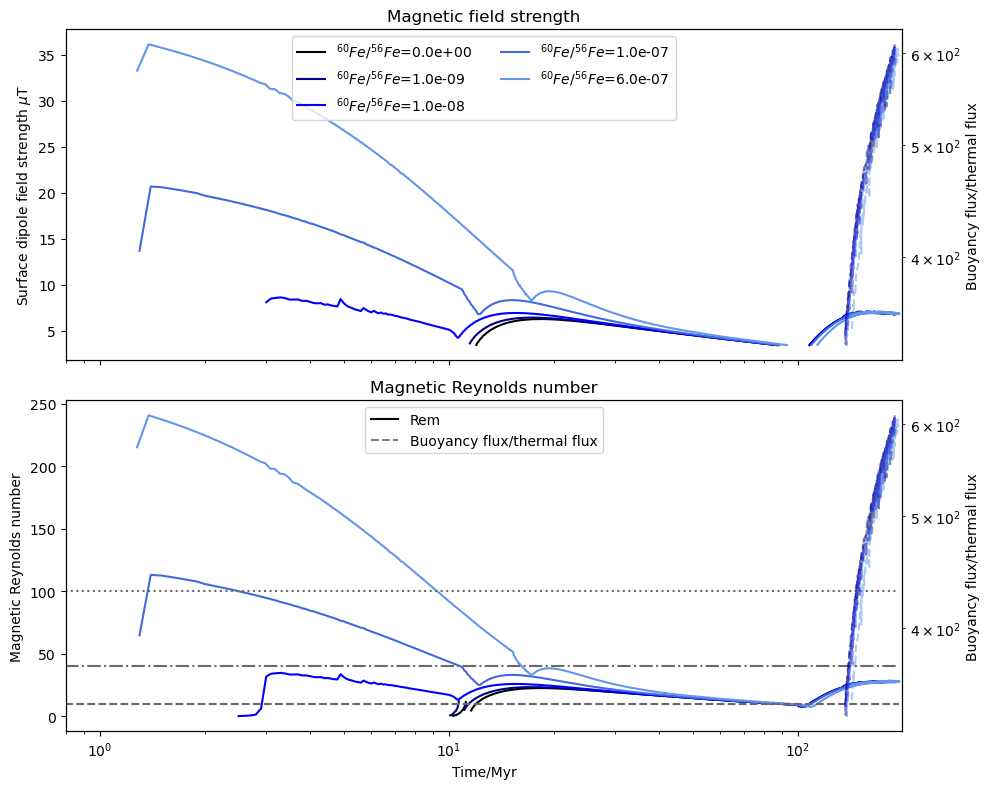

In [27]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    B = npzfile['B']/1e-6
    Rem = npzfile['Rem']
    buoy = npzfile['buoyr'] #ratio of compositional/thermal flux
    threshold=10
    size=2.5 #size of points on scatter plot
    
    #B plot

    ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.1e} {unit}')
    ax2.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],alpha=0.5,linestyle='dashed')
    
    #Rem plot
    if i == 0:   
        ln1 = ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i],label='Rem')
        ln2 = ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5, label='Buoyancy/thermal flux')
    else:
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i])
        ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5)
    
ax[1].hlines(10,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')
ax2.set_ylabel('Buoyancy flux/thermal flux')
ax3.set_ylabel('Buoyancy flux/thermal flux')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper center')
ax[1].legend(ln1+ln2,['Rem','Buoyancy flux/thermal flux'],loc='upper center')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax[0].set_title('Magnetic field strength')
ax[1].set_title('Magnetic Reynolds number')
ax[1].set_xlim(left=0.8)

if save==True:
    plt.savefig(f'../Plots/{folder}BRem_buoy_{var}.png',dpi=450,bbox_inches='tight')

### B and Rem with onset of solidification <a class="anchor" id="BRem-solid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

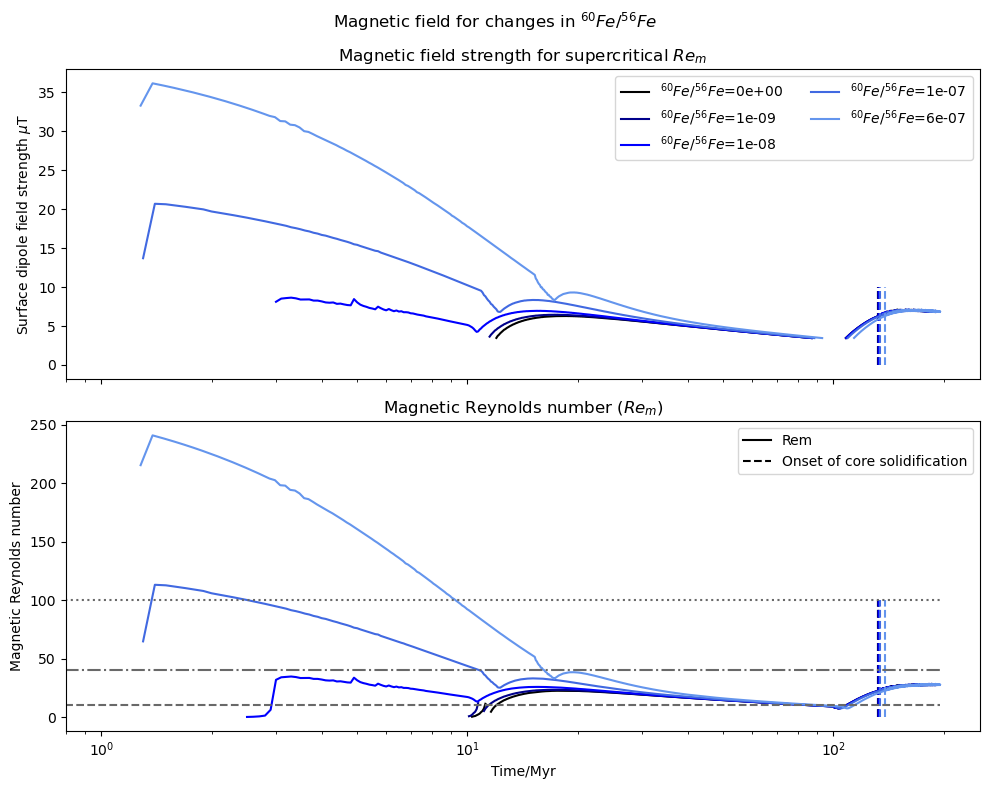

In [29]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
fig.suptitle(f'Magnetic field for changes in {varlab}')

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    tsolid = var_results.loc[var_results['run']==run,'tsolid_start'].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    B = npzfile['B']/1e-6
    Rem = npzfile['Rem']
    buoy = npzfile['buoyr'] #ratio of compositional/thermal flux
    threshold=10
    
    #B plot - adjust units labels here
    ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.0e} {unit}')
    ax[0].vlines(tsolid,0,10,color=colors[i],linestyle='dashed')
    
    #Rem plot
    if i == 0:   
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i],label='Rem')
        ax[1].vlines(tsolid,0,100,color=colors[i],linestyle='dashed',label='Onset of core solidification')
    else:
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i])
        ax[1].vlines(tsolid,0,100,color=colors[i],linestyle='dashed')
    
ax[1].hlines(10,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper right')
ax[1].legend(loc='upper right')
ax[0].set_title('Magnetic field strength for supercritical $Re_m$')
ax[1].set_title('Magnetic Reynolds number ($Re_m$)')
ax[1].set_xscale('log')
ax[1].set_xlim(left=0.8)
if save == True:
    plt.savefig(f'../Plots/{folder}BRem_onset_{var}.png',dpi=450,bbox_inches='tight')

### Inner core size <a class="anchor" id="f"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

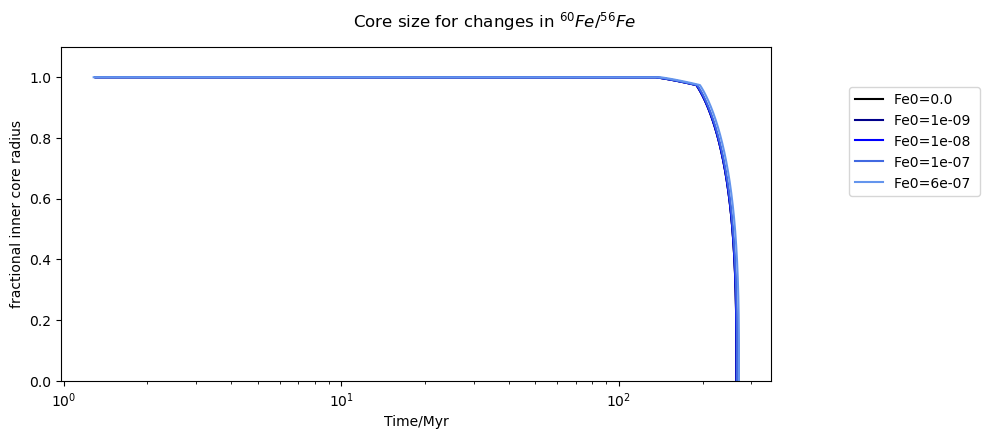

In [30]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Core size for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    f = npzfile['f']
    plt.plot(t,f,label=f'{var}={varval} {unit}',color=colors[i])
plt.xlabel('Time/Myr')
plt.ylabel('fractional inner core radius')
plt.legend(bbox_to_anchor=[1.1,0.9])
plt.xscale('log')
plt.ylim([0,1.1])
if save == True:
    plt.savefig(f'../Plots/{folder}f_{var}.png',dpi=450,bbox_inches='tight')

# Timings 

### Filled <a class="anchor" id="time-filled"></a>
<p align="right">(<a href="#top">back to top</a>)</p>
The points here need removing eventually and the labels need moving around.

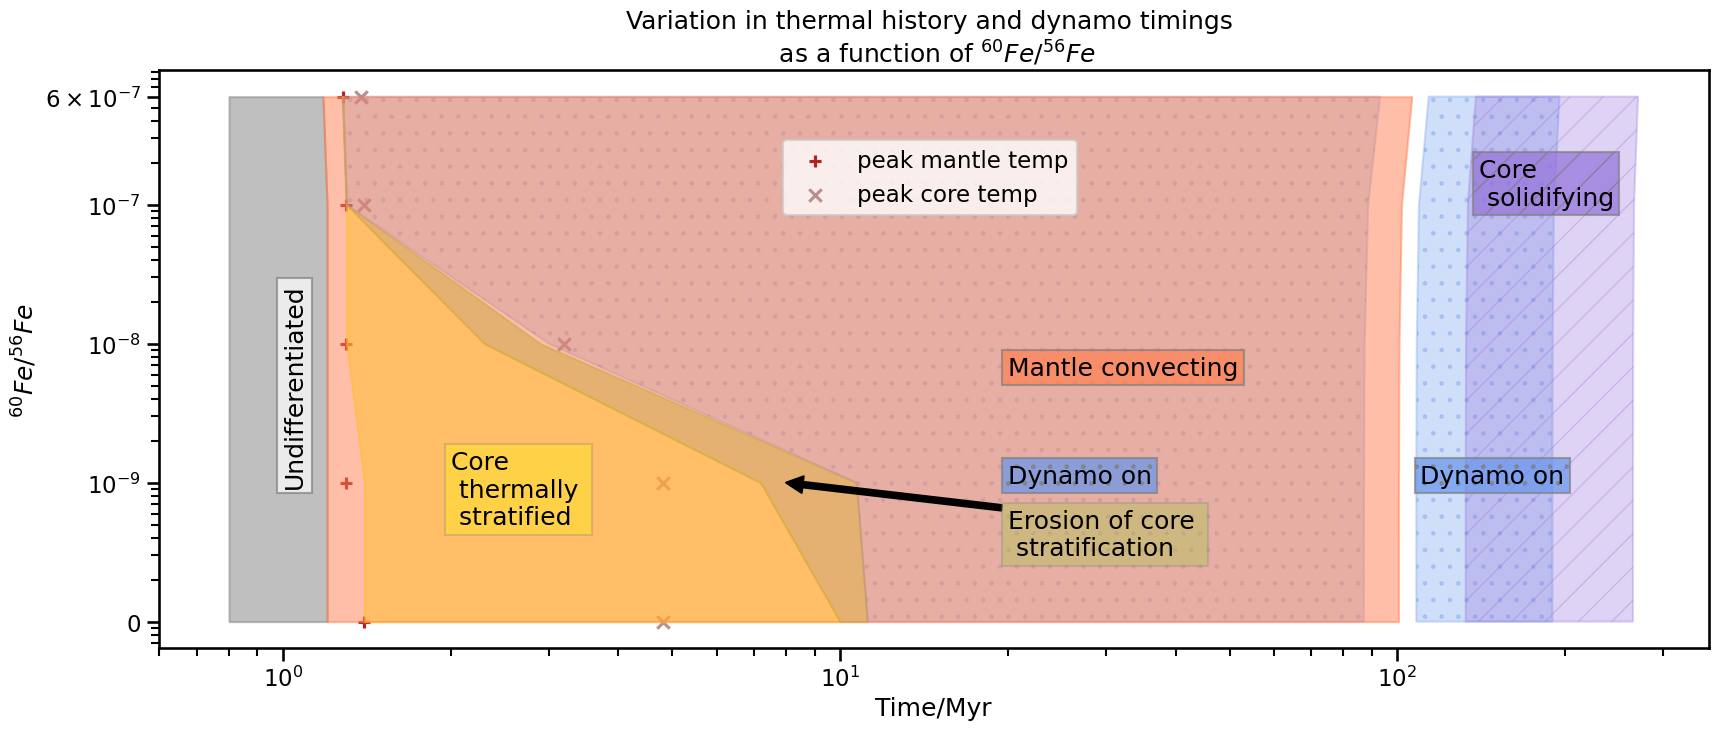

In [53]:
#filter by number of generation periods
#data = data[(data['eta0']>1e11)&(data['eta0']<1e23)]
data.loc[data['Fe0']==0,'Fe0']=1e-10
data['fcond_t']=data['fcond_t'].fillna(data['tsolid']) #if mantle doesnt stop convecting fill until end of thermal evolution

with sns.plotting_context('talk'):
    plt.figure(figsize=[20,7.5])
    plt.title(f'Variation in thermal history and dynamo timings \n as a function of {varlab}')
    plt.scatter(data['tmax'],data[var],label='peak mantle temp',marker='+',color='firebrick')
    plt.scatter(data['tcoremax'],data[var],label='peak core temp',marker='x',color='rosybrown')
    #plt.scatter(data['magon_1'],data[var],label='dynamo start',marker='<',color='darkblue')
    #plt.scatter(data['magoff_1'],data[var],label='dynamo end',marker='>',color='darkblue')
    #plt.scatter(data['magon_2'],data[var],marker='<',color='darkblue')
    #plt.scatter(data['magoff_2'],data[var],marker='>',color='darkblue')
    #plt.scatter(data['tsolid'],data[var],label='core solidified',marker='x',color='black')
    
    plt.fill_betweenx(data[var],0.8,data['diff_time'],color='gray',alpha=0.5)
    plt.fill_betweenx(data[var],data['tstrat_start'],data['tstrat_remove'],color='yellow',alpha=0.5)
    plt.fill_betweenx(data[var],data['tstrat_remove'],data['terode'],color='yellowgreen',alpha=0.5)
    plt.fill_betweenx(data[var],data['magon_1'],data['magoff_1'],color='cornflowerblue',alpha=0.3,hatch='.')
    plt.fill_betweenx(data[var],data['magon_2'],data['magoff_2'],color='cornflowerblue',alpha=0.3,hatch='.')
    plt.fill_betweenx(data[var],data['diff_time'],data['fcond_t'],color='coral',alpha=0.5)
    plt.fill_betweenx(data[var],data['tsolid_start'],data['tsolid'],color='mediumpurple',alpha=0.3,hatch='/')
    

    plt.xlabel('Time/Myr')
    plt.xscale('log')
    bcol = 'white' #color for label box
    ecol ='gray' #edgecolor for label box
    aval=0.7 #alpha for label box

    #add text labels
    plt.text(x=1,y=1e-9,s='Undifferentiated',rotation='vertical',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
    plt.text(x=20,y=max(data[var])*1e-2,s='Mantle convecting',bbox=dict(edgecolor=ecol,facecolor='coral',alpha=aval))
    plt.text(x=20,y=1e-9,s='Dynamo on',bbox=dict(edgecolor=ecol,facecolor='cornflowerblue',alpha=aval,hatch='.'))
    plt.text(x=110,y=1e-9,s='Dynamo on',bbox=dict(edgecolor=ecol,facecolor='cornflowerblue',alpha=aval,hatch='.'))
    plt.text(x=140,y=1e-7,s='Core \n solidifying',bbox=dict(edgecolor=ecol,facecolor='mediumpurple',alpha=aval,hatch='/'))
    plt.annotate('Erosion of core \n stratification',(8,1e-9),(20,3e-10),arrowprops=dict(facecolor='black',edgecolor='black'),bbox=dict(edgecolor=ecol,facecolor='yellowgreen',alpha=0.3))
    plt.text(x=2,y=5e-10,s='Core \n thermally \n stratified',bbox=dict(edgecolor=ecol,facecolor='yellow',alpha=0.3))

    plt.ylabel(f'{varlab} {unit}')
    plt.yscale('log')
    plt.yticks(ticks=[1e-10,1e-9,1e-8,1e-7,6e-7],labels=[0,'$10^{-9}$','$10^{-8}$','$10^{-7}$','$6\\times10^{-7}$'])
    
    plt.legend(bbox_to_anchor=[0.6,0.9])
if save == True:
    plt.savefig(f'../Plots/{folder}all_timings_{var}.png',dpi=450,bbox_inches='tight') 

### Dynamo generation time <a class="anchor" id="dynamo"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

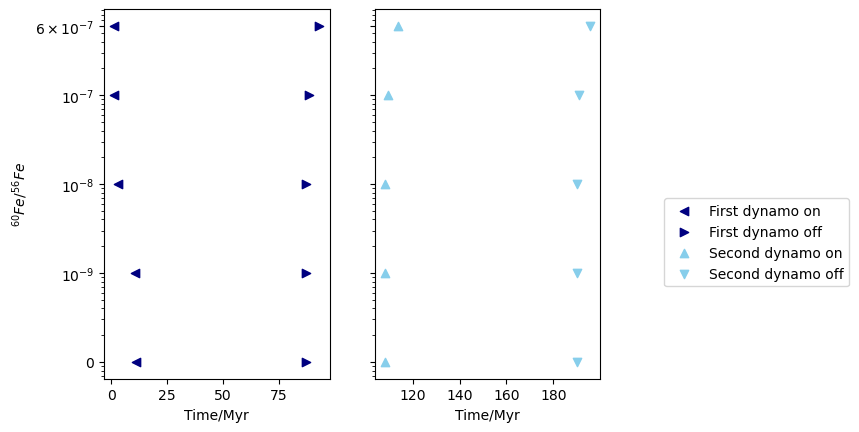

In [55]:
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)
ax[0].scatter(data['magon_1'],data[var],label='First dynamo on',marker='<',color='navy')
ax[0].scatter(data['magoff_1'],data[var],label='First dynamo off',marker='>',color='navy')

ax[1].scatter(data['magon_2'],data[var],label='Second dynamo on',marker='^',color='skyblue')
ax[1].scatter(data['magoff_2'],data[var],label='Second dynamo off',marker='v',color='skyblue')

ax[0].set_ylabel(varlab)
ax[0].set_yscale('log')
ax[0].set_yticks(ticks=[1e-10,1e-9,1e-8,1e-7,6e-7],labels=[0,'$10^{-9}$','$10^{-8}$','$10^{-7}$','$6\\times10^{-7}$'])
    
ax[0].set_xlabel('Time/Myr')
ax[1].set_xlabel('Time/Myr')
fig.legend(bbox_to_anchor=[1.3,0.5])

#plt.savefig(f'../Plots/{folder}/dynamot_{var}.png')

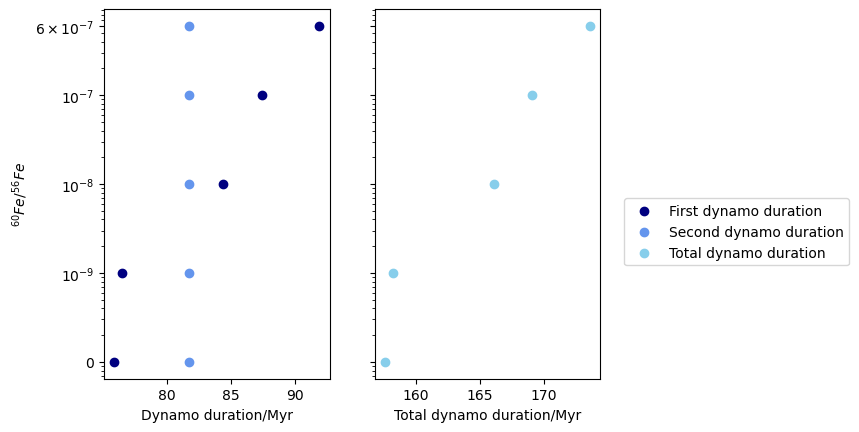

In [61]:
dur1 = data['magoff_1']-data['magon_1']
dur2 = data['magoff_2']-data['magon_2']
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)
ax[0].scatter(dur1,data[var],label='First dynamo duration',color='navy')
ax[0].scatter(dur2[dur2>0],data[var][dur2>0],label='Second dynamo duration',color='cornflowerblue')

ax[1].scatter(dur1+dur2,data[var],label='Total dynamo duration',color='skyblue')


ax[0].set_ylabel(varlab)
ax[0].set_xlabel('Dynamo duration/Myr')
ax[1].set_xlabel('Total dynamo duration/Myr')
ax[0].set_yscale('log')
ax[0].set_yticks(ticks=[1e-10,1e-9,1e-8,1e-7,6e-7],labels=[0,'$10^{-9}$','$10^{-8}$','$10^{-7}$','$6\\times10^{-7}$'])
fig.legend(bbox_to_anchor=[1.3,0.5])

if save == True:
    plt.savefig(f'../Plots/{folder}/dynamodur_{var}.png',bbox_inches='tight')

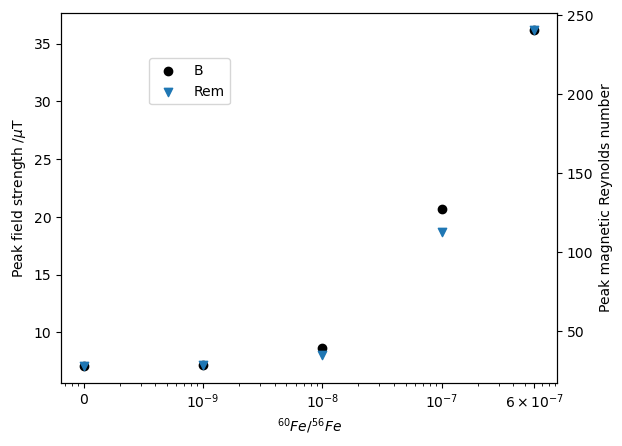

In [63]:
#find max field strengths excluding the pre-stratification field
maxB = np.zeros([nrun])
maxR = np.zeros([nrun])
for i in range(nrun):
    run = int(minrun+i)
    terode = data.loc[var_data['run']==run,'terode'].values[0]
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    B = npzfile['B']
    Rem = npzfile['Rem']
    maxB[i] = np.max(B[t>terode])
    maxR[i] = np.max(Rem[t>terode])
    
fig, ax1 = plt.subplots(nrows=1,ncols=1,sharex=True)
ax2 = ax1.twinx()
#plot unchanged B
ln1 = ax1.scatter(data[var],data['max_B']/1e-6,label='B',marker='o',color='black')
ln2 = ax2.scatter(data[var],data['max_R'],label='Rem',marker='v')
#plot max after stratification
#ln1 = ax1.scatter(data[var],maxB/1e-6,label='B',marker='o',color='black')
#ln2 = ax2.scatter(data[var],maxR,label='Rem',marker='v')
ax1.set_xlabel(varlab)
#ax1.legend(loc='upper left')
fig.legend(['B','Rem'],bbox_to_anchor=[0.4,0.8])
ax1.set_ylabel('Peak field strength /$\mu$T')
ax2.set_ylabel('Peak magnetic Reynolds number')
ax1.set_xscale('log')
ax1.set_xticks(ticks=[1e-10,1e-9,1e-8,1e-7,6e-7],labels=[0,'$10^{-9}$','$10^{-8}$','$10^{-7}$','$6\\times10^{-7}$'])
if save == True:
    plt.savefig(f'../Plots/{folder}/peakB_all_{var}.png',bbox_inches='tight')

### Solidification time <a class="anchor" id="solid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

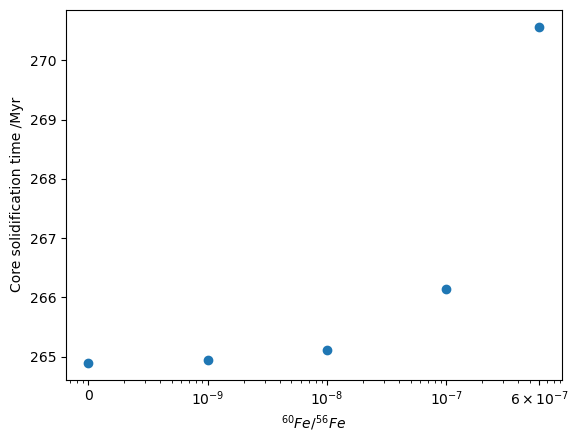

In [58]:
fig = plt.figure()
plt.scatter(data[var],data['tsolid'],label='Peak mantle temperature',marker='o')
plt.xlabel(varlab)
plt.ylabel('Core solidification time /Myr')
plt.xscale('log')
plt.xticks(ticks=[1e-10,1e-9,1e-8,1e-7,6e-7],labels=[0,'$10^{-9}$','$10^{-8}$','$10^{-7}$','$6\\times10^{-7}$'])

if save == True:
    plt.savefig(f'../Plots/{folder}/solidt_{var}.png',bbox_inches='tight') 

## Stagnant lid thickness <a class="anchor" id="lid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

(0.0, 1.0)

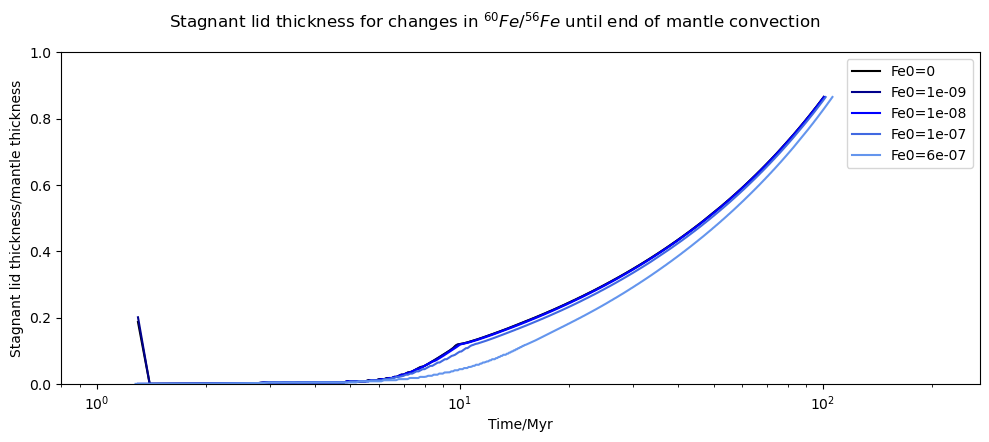

In [59]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Stagnant lid thickness for changes in {varlab} until end of mantle convection')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    rmantle = var_data.loc[var_data['run']==run,'r'].values[0]/2
    fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    d0 = npzfile['d0']
    if fcond_t > 0:
        plt.plot(t[t<=fcond_t],d0[t<=fcond_t]/rmantle,label=f'{var}={varval:.2g}',color=colors[i])
    else:
        plt.plot(t,d0/rmantle,label=f'{var}={varval:.2g}',color=colors[i])
plt.xlabel('Time/Myr')
plt.ylabel('Stagnant lid thickness/mantle thickness')
plt.legend()
plt.xscale('log')
plt.xlim([0.8,tend])
plt.ylim([0,1])
#if save == True:
 #   plt.savefig(f'../Plots/{folder}d0_{var}.png',dpi=450,bbox_inches='tight')